## Homework Lecture 15

- Write a code to solve the minimum of 2D function with Monte Carlo method

    $$ f(x,y) = \frac{x^2}{2} + \frac{y^2}{3} - \frac{xy}{4} $$

In [1]:
%matplotlib inline
#matplotlib notebook

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import scipy as sp
from math import pi

# Plot text color, uncomment 'black' for a light background
COLOR = 'white'
#COLOR = 'black'

plt.rcParams['axes.facecolor']= '#373e4b'
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

'''   
     f(x,y) = x^2/2 + y^2/3 - xy/4
'''
def f(x, y):
    return (x**2)/2 + (y**2)/3 - x*y/4


In [2]:
def f2(x,y):
    return x**2 + y**2


def MonteCarloFuncMin2D(func, xmin=-2, xmax=2, ymin=-2, ymax =2, N=10, display=False):
    """
    Monte Carlo Minimization function
    """
    # randomly generate array of x-values in the range: xmin, xmax
    nx = random.uniform(xmin,xmax,N)
    nx.sort() # sort array

    # randomly generate array of y-values in the range: ymin, ymax
    ny = random.uniform(ymin,ymax,N)
    ny.sort() # sort array
    
    #generate array NxN array for holding the z values of the function
    z = np.zeros((N,N), dtype=float)
    
    # evaluates the function at each of the x,y pairs and stores in the z array
    for i in range(N):
        for j in range(N):
            z[i,j] = func(nx[i],ny[j])

    # finds the minimum
    func_min = np.amin(z)
    ind = np.unravel_index(np.argmin(z, axis=None), z.shape)

    # Displays the graph of function values
    if display:
        x,y = np.meshgrid(nx,ny)
        z = f2(x, y)
        fig = plt.figure()
        ax = fig.gca(projection='3d')
        ax.plot_surface(x,y,z, cmap='summer', alpha=0.8)
        cset = ax.contour(x,y,z, zdir='z', offset=0)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('f')
        plt.show()
    
    return func_min, (nx[ind[0]],ny[ind[1]])

def MCFuncAvg(func, xmin=-1, xmax=1, ymin=-1, ymax=1, N=10, iterate=10):
    '''
    Averages several Monte Carlo Minimizations
    '''
    pos = []
    z_min = []
    
    for i in range(iterate):
        # calculates N minumum values using the FuncMin2D function
        temp_val, temp_pos = MonteCarloFuncMin2D(func, xmin=xmin, xmax=xmax, 
                                                 ymin=ymin, ymax=ymax, N=N)
        z_min.append(temp_val)
        pos.append(temp_pos)
    
    average_min = sum(z_min)/len(z_min)
    
    average_pos = [0,0]
    
    for j in range(len(pos)):
        average_pos[0] += pos[j][0]
        average_pos[1] += pos[j][1]
    
    average_pos = [x/len(pos) for x in average_pos]
    
    return average_min, (average_pos[0], average_pos[1])


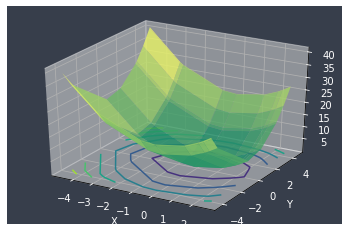

minimum value: 0.008977646817348575
x,y points of minimum: (-0.0734160630481977, -0.16755252286599998)


In [3]:
xmin = -5
xmax = 5
ymin = -5
ymax = 5

m, p = MonteCarloFuncMin2D(f,xmin=xmin,xmax=xmax,ymin=ymin,
                           ymax=ymax,N=10,display=True)

print("minimum value:", m)
print("x,y points of minimum:", p)

In [4]:
m, p = MCFuncAvg(f, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, iterate = 10, N=10)

print("minimum value:", m)
print("x,y points of minimum:", p)

minimum value: 0.38290749182927614
x,y points of minimum: (-0.12023536073246288, 0.1709597311843985)


In [5]:
m, p = MonteCarloFuncMin2D(f, xmin=xmin, xmax=xmax, ymin=ymin, ymax=ymax, N=100)

print("minimum value:", m)
print("x,y points of minimum:", p)

minimum value: 0.005270194031272176
x,y points of minimum: (0.0433394354754677, 0.13139245925988607)


In [6]:
def f3(x, y):
    return (x**4+3*x**3-2*x**2+5)/2 + (y**2)/3 - x*y/4

In [7]:
f3min, f3_min_xy = MCFuncAvg(f3, xmin=xmin, xmax=xmax, ymin=ymin,
                             ymax=ymax, iterate = 10, N=100)

print("minimum value:", f3min)
print("x,y points of minimum:", f3_min_xy)

minimum value: -8.093827038400734
x,y points of minimum: (-2.630257373124331, -0.9718050953671881)


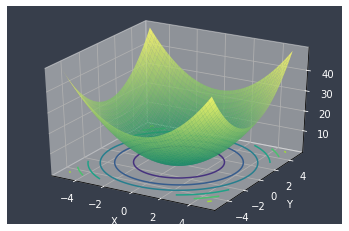

minimum value: -8.108165364288817
x,y points of minimum: (-2.652109485880243, -1.0014468045575176)


In [8]:
f3min, f3_min_xy = MonteCarloFuncMin2D(f3, xmin=xmin, xmax=xmax, ymin=ymin,
                                       ymax =ymax, N=1000, display=True)

print("minimum value:", f3min)
print("x,y points of minimum:", f3_min_xy)